# <font color="darkblue"> Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

N_PONTOS_TOTAL = 1000

# Criando a reta
n1, n2 = np.random.uniform(-1, 1, 2)
p1 = [n1, n2]

n1, n2 = np.random.uniform(-1, 1, 2)
p2 = [n1, n2]

# Coeficiente angular (m = (y2 -y1) / (x2 - x1))
m = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Coeficiente linear (b = y - mx)
b = p1[1] - m*p1[0]

data = [] # dataset
y = []
for _ in range(N_PONTOS_TOTAL):
    n1, n2 = np.random.uniform(-1, 1, 2)
    x = [1, n1, n2]
    data.append(x)

    # Funcao alvo
    f_x = m * n1 + b 

    # Mapeia os pontos de acordo com a reta
    if ( (aux := np.sign(m*n1 - n2 + b)) != 0):    
        y.append(aux) # Equacao geral da reta

f = [m, b]

### Visualizando o dataset

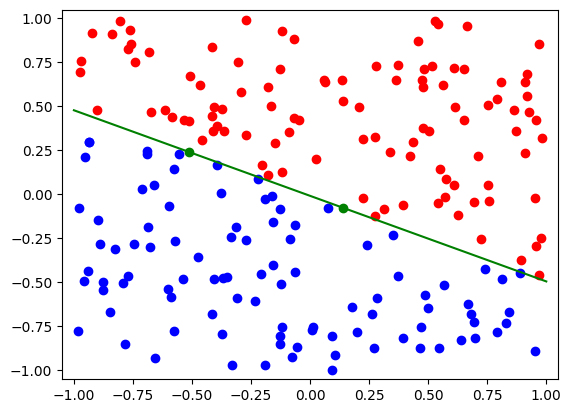

In [2]:
line = np.linspace(-1, 1, 1000) 
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.plot(line, m*line + b, label="f(x)", c="green")

# Pontos usados na criacao da reta
plt.scatter(p1[0], p1[1], c='green')
plt.scatter(p2[0], p2[1], c='green')

for i in range(len(data[:200])):
    if (y[i] == 1):
        plt.scatter(data[i][1], data[i][2], c='blue')
    else:        
        plt.scatter(data[i][1], data[i][2], c='red')

plt.show()    

### Função para visualização dos passos do PLA

In [3]:
%matplotlib inline
def plotGrafico(data, w, y, f, n, title=""):    
    nPontos = len(data)       

    ax = plt.gca()

    plt.axis([-1.05, 1.05, -1.05, 1.05])
    plt.title(title or f"Trained with N={n}")

    x_plt = [data[i][1] for i in range(nPontos)]
    y_plt = [data[i][2] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=9, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=9, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='#fb05ff', linestyle='dashed') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)
    plt.show(block=False)
    plt.pause(0.03)   


### Função para construir lista de pontos classificados incorretamente

In [4]:
def buildPCI(X: np.array, y: np.array, w: np.array) -> tuple:
    """
    Builds a set of misclassified points (PCI) based on the current
    weight vector.

    Parameters
    ----------
    X : numpy.ndarray
        A matrix containing the input data.
    y : numpy.ndarray
        A vector containing the target labels (+1 or -1).
    w : numpy.ndarray
        A vector containing the weights of the linear classifier.

    Returns
    -------
    tuple
        A tuple containing the set of misclassified points and 
        corresponding labels.
    """
    h = np.sign(X.dot(w))
    bool_index = (h != y)
    PCI = X[bool_index]
    Y = y[bool_index]

    return np.array(PCI), np.array(Y)

### Algoritmo PLA

In [5]:
def PLA(X: np.array, y: np.array, plot: bool=True) -> np.array:
    """
    Performs the Perceptron Learning Algorithm (PLA) to find a linear 
    classifier for a dataset.

    Parameters
    ----------
    X : numpy.ndarray
        A matrix containing the input data.
    y : numpy.ndarray 
        A vector containing the target labels (+1 or -1). 
    plot : bool, default=True
        Whether to print the actual weight iteration and the size of
        PCI's list and plot the linear classifier at each iteration


    Returns
    -------
        w : numpy.ndarray 
            A vector containing the weights of the linear classifier.
    """
    PCI = X.copy()
    orig_y = y.copy()
    w = np.zeros(3)
    len_x = len(X)
    while len(PCI) > 0:
        rand_index = np.random.randint(len(PCI))
        x = PCI[rand_index]

        w += y[rand_index] * x

        PCI, y = buildPCI(X, orig_y, w)
        if plot:
            print("Weights:", w)
            print("Len PCI: ", len(PCI))
            plotGrafico(X, w, orig_y, f, len_x)
    return w

In [6]:
def get_train_test(data: np.array, 
                   y: np.array, 
                   train_size: float, 
                   test_size: float) -> tuple:
    """
    Return a tuple of training and test data with different sizes.

    Parameters
    ----------
    data : numpy.ndarray 
        A matrix containing the input data.
    y : numpy.ndarray 
        A vector containing the target labels (+1 or -1).
    train_size : float 
        A percentage of data to be the train.
    test_size : flaot 
        A percentage of data to be the test.

    Returns
    -------
    tuple
        A tuple of arrays:
        - X_train: train data 
        - y_train: train target data 
        - X_test: test data
        - y_test: testtarget data 
    """
    indexes_train = list(np.random.randint(len(data), 
                                           size=int(len(data)*train_size)))
    indexes_test = list(np.random.randint(len(data), 
                                           size=int(len(data)*test_size)))
    
    X_train = np.array([data[i] for i in indexes_train])
    y_train = np.array([y[i] for i in indexes_train])

    X_test = np.array([data[i] for i in indexes_test])
    y_test = np.array([y[i] for i in indexes_test])

    return (
        X_train, 
        y_train, 
        X_test, 
        y_test
        )

### Calculando a acurácia

In [7]:
def get_accuracy(X: np.array, y: np.array, w: np.array) -> float:
    """
    Calculates the accuracy of a binary classifier on a dataset.

    Parameters
    ----------
    X : numpy.ndarray
        A matrix containing the input data.
    y : numpy.ndarray 
        A vector containing the target labels (+1 or -1).
    w : numpy.ndarray 
        A vector containing the model weights.

    Returns
    -------
        float
            The accuracy of the binary classifier on the dataset.
    """
    h = np.sign(X.dot(w))
    bool_index = (h == y)
    return len(X[bool_index]) / len(X)

In [8]:
X = np.array(data)
y = np.array(y)

### Tamanho da amostra = 10

In [9]:
X_train_10, y_train_10, X_test_500, y_test_500 = get_train_test(X, y, 
                                                                0.01, 0.5)

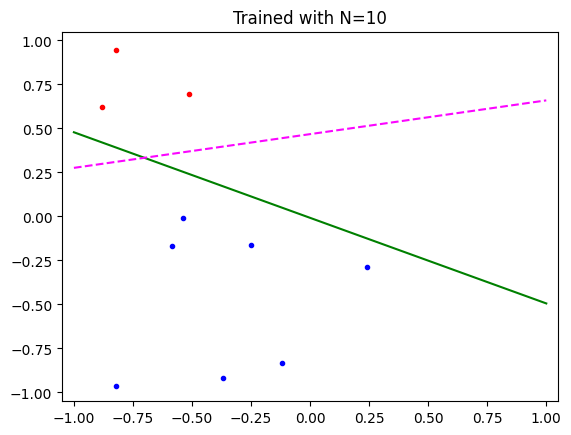

Weights n=10: [ 1.          0.40969417 -2.13712305]
Acurácia com test_size=500, n=10: 0.748


In [10]:
weights_10 = PLA(X_train_10, y_train_10)
print(f"Weights n=10: {weights_10}")
# len(test) = 500
print(f"Acurácia com test_size=500, n=10: {get_accuracy(X_test_500, y_test_500, weights_10):.3f}")

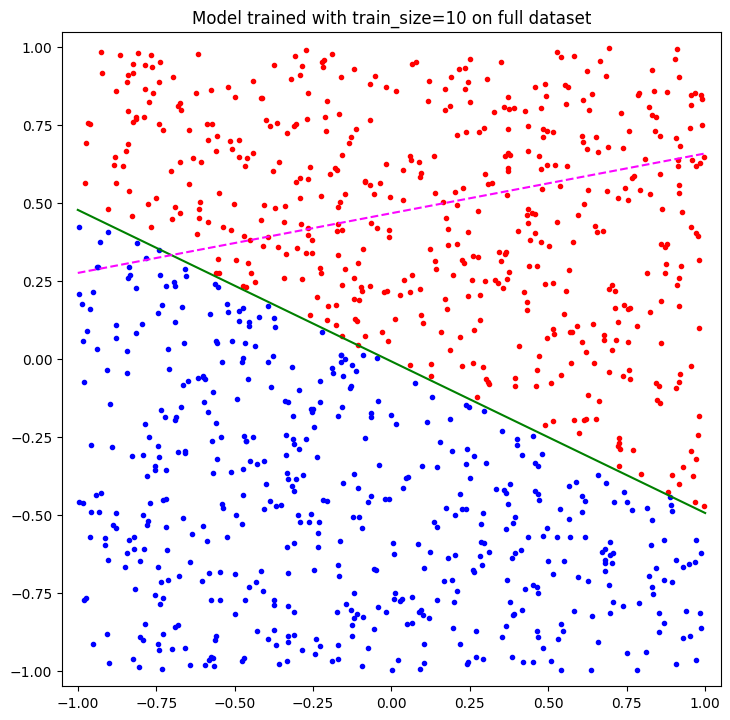

Acurácia do modelo no dataset completo com len(train_data)=10: 74.40%


In [11]:
# Aplicando esse peso do n=10 no dataset original
acc_10 = get_accuracy(X, y, weights_10)
plt.figure(figsize=(8.5, 8.5))
plotGrafico(X, weights_10, y, f, len(X), title= "Model trained with train_size=10 on full dataset")
BOLD = '\033[1m'
END = '\033[0m'
print(f"Acurácia do modelo no dataset completo com len(train_data)=10: {BOLD}{acc_10*100:.2f}%{END}")

### Tamanho da amostra = 100

In [12]:
X_train_100, y_train_100, X_test_500_, y_test_500_ = get_train_test(X, y, 
                                                                    0.1, 0.5)

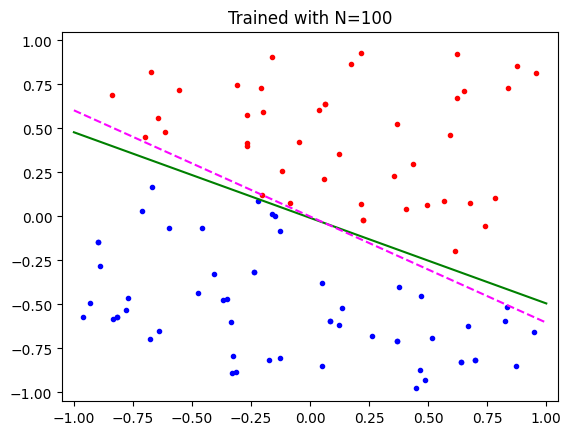

Weights n=100: [ 0.         -0.79485289 -1.31771293]
Acurácia com test_size=500, n=100: 0.966


In [13]:
weights_100 = PLA(X_train_100, y_train_100)
print(f"Weights n=100: {weights_100}")
# len(test) = 500
print(f"Acurácia com test_size=500, n=100: {get_accuracy(X_test_500_, y_test_500_, weights_100):.3f}")

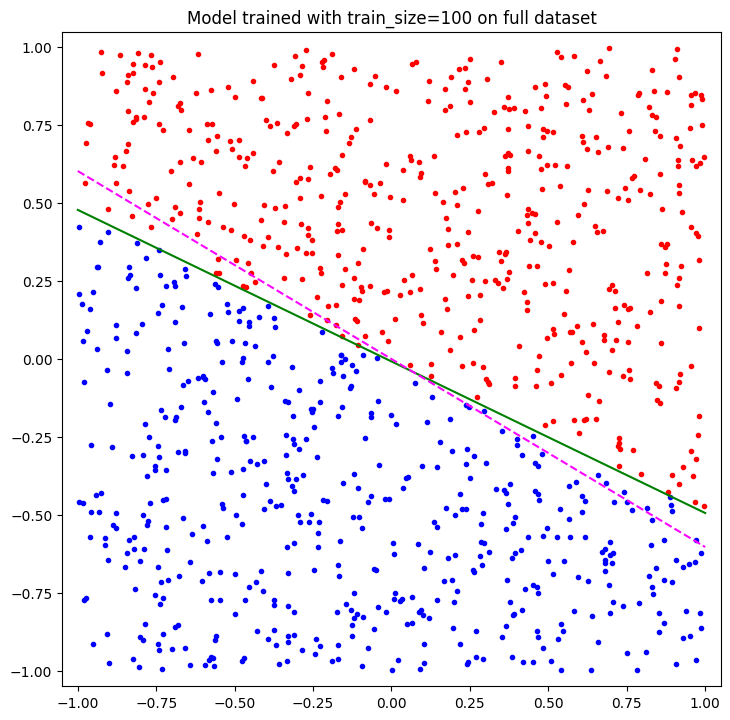

Acurácia do modelo no dataset completo com len(train_data)=100: 97.70%


In [14]:
# Aplicando esse peso do n=100 no dataset original
acc_100 = get_accuracy(X, y, weights_100)
plt.figure(figsize=(8.5, 8.5))
plotGrafico(X, weights_100, y, f, len(X), title= "Model trained with train_size=100 on full dataset")
print(f"Acurácia do modelo no dataset completo com len(train_data)=100: {BOLD}{acc_100*100:.2f}%{END}")

### Tamanho da amostra = 200

In [15]:
X_train_200, y_train_200, X_test_500__, y_test_500__ = get_train_test(X, y, 
                                                                      0.2, 0.5)

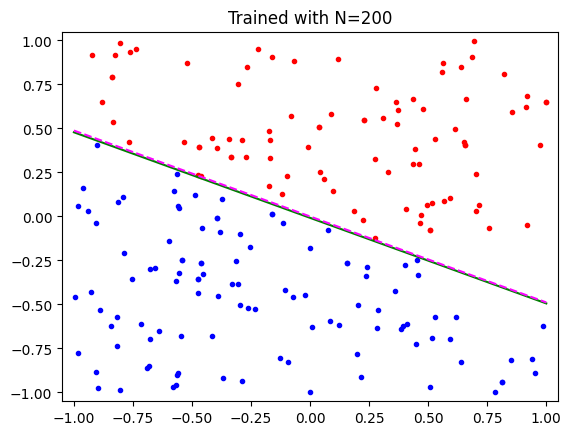

Weights n=200: [ 0.         -2.05462584 -4.20805727]
Acurácia no test_size=500 n=200: 1.000


In [16]:
weights_200 = PLA(X_train_200, y_train_200)
print(f"Weights n=200: {weights_200}")
# len(test) = 500
print(f"Acurácia no test_size=500 n=200: {get_accuracy(X_test_500__, y_test_500__, weights_200):.3f}")

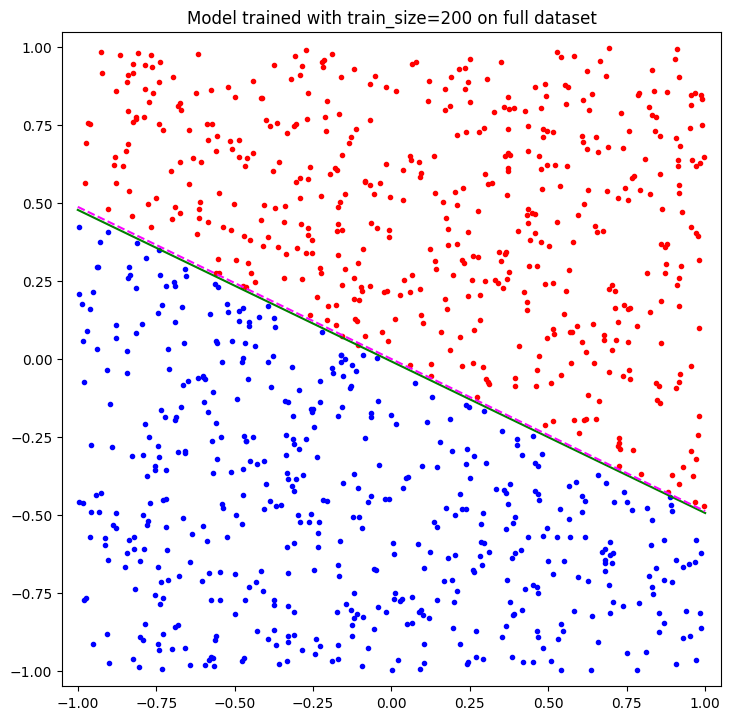

Acurácia do modelo no dataset completo com len(train_data)=200: 99.80%


In [17]:
# Aplicando esse peso do n=200 no dataset original
acc_200 = get_accuracy(X, y, weights_200)
plt.figure(figsize=(8.5, 8.5))
plotGrafico(X, weights_200, y, f, len(X), title= "Model trained with train_size=200 on full dataset")
print(f"Acurácia do modelo no dataset completo com len(train_data)=200: {BOLD}{acc_200*100:.2f}%{END}")

## Fazendo teste geral rodando 200 vezes para pegar a média de acurácia

In [18]:
time_run = 200
time_split_again = time_run // 10

acc_10 = []
acc_100 = []
acc_200 = []

# Produzido para a cada 10 iterações, pegar novos dados de treinamento e teste
# para garantir aleatorização melhor
for _ in range(time_split_again):
    X_train_10, y_train_10, X_test_500, y_test_500 = get_train_test(X, y, 
                                                                    0.01, 0.5)
    
    X_train_100, y_train_100, X_test_500_, y_test_500_ = get_train_test(X, y, 
                                                                        0.1, 0.5)
    
    X_train_200, y_train_200, X_test_500__, y_test_500__ = get_train_test(X, y, 
                                                                          0.2, 0.5)
    for _ in range(10):    
        weights_10 = PLA(X_train_10, y_train_10, plot=False)
        weights_100 = PLA(X_train_100, y_train_100, plot=False)
        weights_200 = PLA(X_train_200, y_train_200, plot=False)

        acc_10.append(get_accuracy(X_test_500, y_test_500, weights_10))
        acc_100.append(get_accuracy(X_test_500, y_test_500, weights_100))
        acc_200.append(get_accuracy(X_test_500__, y_test_500__, weights_200))

print(f"Average accuracy for {time_run} runs: ")
print(f"Average Accuracy n=10: {np.mean(acc_10):.3f}")
print(f"Average Accuracy n=100: {np.mean(acc_100):.3f}")
print(f"Average Accuracy n=200: {np.mean(acc_200):.3f}")


Average accuracy for 200 runs: 
Average Accuracy n=10: 0.906
Average Accuracy n=100: 0.991
Average Accuracy n=200: 0.994


Ao observar os dados obtidos nas plotagens dos gráficos e nos dados acima de acurácia média para cada quantidade de pontos, percebemos uma das partes mais claras sobre Aprendizagem de Máquina, em que quanto mais próximo for o tamanho do treinameto do tamanho do dataset (população), a acurácia será maior, visto que, por causa da Lei dos Grandes Números, os dados de treinamento serão mais parecidos com o dataset original.